In [1]:
"""
参考リスト
https://networkx.github.io/documentation/stable/
-> NetworkXの公式ドキュメント、用法が載っている
http://www.jp.undp.org/content/tokyo/ja/home/sustainable-development-goals.html
-> Sustainable Development Goals（データ出展）
"""
import codecs 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from gensim import corpora, matutils
from janome.tokenizer import Tokenizer

In [2]:
stop_words = ['持続', '可能', '開発', 'ため', 'アジェンダ', '構成', 'グローバル', '目標', '一つ', '複数', '目標',
              '達成', 'ため', '包括', 'アプローチ', '必要', '不可欠']
#stop_words = []

In [3]:
def token_generator(text):
    tokenizer = Tokenizer()
    for text_line in text.split('\n'):
        for token in tokenizer.tokenize(text_line):
            if token.part_of_speech.split(',')[0] == '名詞' and token.surface not in stop_words:
                if len(token.surface) > 1 and not(token.surface.isdigit()):
                    yield token.surface

In [4]:
# データの読み込み
# split sentences into words(separated by white-space)
text_processed = []
t = Tokenizer()
for i in range(17):
    file_path = "./files_level1/data/SDGs"+str(i+1)+".txt"
    with codecs.open(file_path, "r", "utf-8") as f:
        txt = f.read()
        text_processed.append(list(token_generator(txt)))

print(text_processed[0])

['形態', '貧困', '根絶', '人類', '直面', '重要', '課題', '世界', '極度', '貧困', '半分', '以下', '減少', '多く', '人間', '基本', 'ニーズ', '世界', '以上', 'ドル', 'セント', '未満', '十分', '食料', 'きれい', '衛生', '施設', '利用', '人々', '中国', 'インド', '国々', '経済', '成長', '貧困', '進捗', '男女', '一様', '女性', '雇用', '教育', '資産', 'アクセス', '平等', '貧困', '状態', '確率', '男性', '世界', '極度', '貧困', '人々', 'アジア', 'サハラ', '以南', 'アフリカ', '地域', '進捗', '気候', '変動', '紛争', '食料', '不安', '新た', '脅威', '割合', '今後', '上昇', 'SDGs', 'たち', '開始', '取り組み', '完了', '形態', '貧困', '終止符', '大胆', 'コミットメント', '脆弱', '状況', '人々', '対象', '基本', '資源', 'サービス', 'アクセス', '改善', '紛争', '気候', '変動', '関連', '災害', '被災', 'コミュニティ', '支援', 'こと', '貧困', '解消']


In [5]:
# 辞書の作成
dictionary = corpora.Dictionary(text_processed)

In [6]:
#BoW matrixの作成
corpus = [dictionary.doc2bow(doc) for doc in text_processed]
doc_matrix = matutils.corpus2csc(corpus).transpose()

In [7]:
# cos_similarityの作成
cos_sim = np.zeros([17, 17])
var_SDGs = doc_matrix.dot(doc_matrix.transpose()).toarray()
for i in range(17):
    for j in range(17):
        cos_sim[i,j] = var_SDGs[i,j]/(np.sqrt(var_SDGs[i, i])*np.sqrt(var_SDGs[j, j]))
print(cos_sim[:6,:6])

[[ 1.          0.22439704  0.1339179   0.23424391  0.20888534  0.23048861]
 [ 0.22439704  1.          0.16157535  0.19915099  0.24427604  0.17440789]
 [ 0.1339179   0.16157535  1.          0.28441636  0.17725017  0.16667937]
 [ 0.23424391  0.19915099  0.28441636  1.          0.27963377  0.12372835]
 [ 0.20888534  0.24427604  0.17725017  0.27963377  1.          0.10942203]
 [ 0.23048861  0.17440789  0.16667937  0.12372835  0.10942203  1.        ]]


In [8]:
G=nx.Graph()

In [9]:
for i in range(17):
    for j in range(17):
        if i != j and cos_sim[i,j]>0.3:
            G.add_edge(str(i),str(j),weight=cos_sim[i,j])

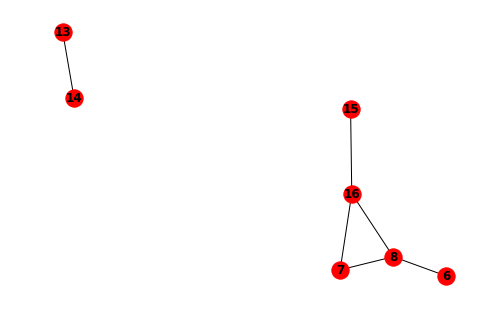

In [10]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()